# 3. More Distributions and the Central Limit Theorem

## The Normal Distribution

- symmetrical
- area under the curve = 1
- curve never hits 0
- 68% of the area under the normal distribution, is within 1 standard deviation of the mean
- 95% falls within 2 standard deviations
- 99.7% falls within 3 standard deviations
- 

In [1]:
# what percent of women are shorter than 154 cm?

from scipy.stats import norm
norm.cdf(154, 161, 7)
# 161 = mean
# 7 = std deviation

0.15865525393145707

In [2]:
# what percent of women are taller than 154?

1 - norm.cdf(154, 161, 7)

0.8413447460685429

In [3]:
# what percent of women are 154-157 cm?

norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)

0.1251993291672192

In [4]:
# what height are 90% of women shorter than?

norm.ppf(0.9, 161, 7)

169.9708609588122

In [5]:
# what height are 90% of women taller than?

norm.ppf((1 - 0.9), 161, 7)

152.0291390411878

In [6]:
# Generating Random Numbers

# generate 10 random heights
norm.rvs(161, 7, size=10)

array([162.42130518, 171.32079678, 147.97486336, 161.46153141,
       155.98687489, 165.13446085, 159.57099371, 162.85275509,
       152.13346759, 161.76122416])

#### Distribution of Amir's sales

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
amir_deals = pd.read_csv('amir_deals.csv')

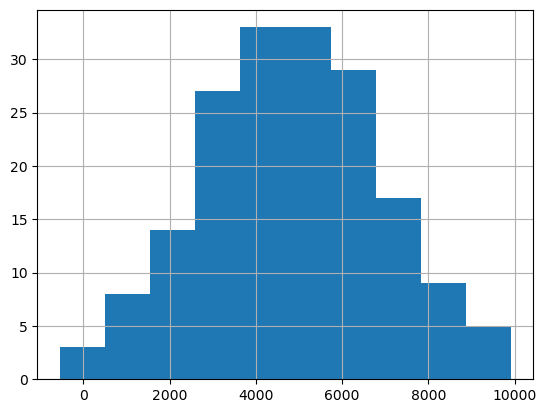

In [9]:
# Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.

# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

#### Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

In [ ]:
from scipy.stats import norm

# What's the probability of Amir closing a deal worth less than $7500?

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


In [11]:
# What's the probability of Amir closing a deal worth more than $1000?

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

0.9772498680518208


In [12]:
# What's the probability of Amir closing a deal worth between $3000 and $7000?

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


In [13]:
# What amount will 25% of Amir's sales be less than?

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


#### Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

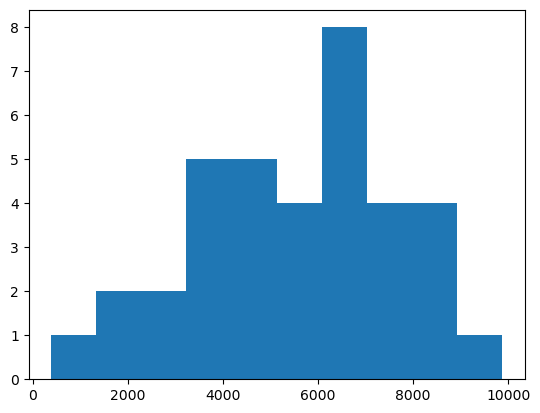

In [14]:
# Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean
# Calculate new average amount
new_mean = 5000 + (5000*0.2)

# Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.
# Calculate new standard deviation
new_sd = 2000 + (2000*0.3)

# Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.
# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Plot the distribution of the new_sales amounts using a histogram and show the plot.
# Create histogram and show
plt.hist(new_sales)
plt.show()

#### Which market is better?

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

In [16]:
# Current
print('Current: ', 1 - norm.cdf(1000, 5000, 2000))

# Predicted
print('Predicted: ', 1 - norm.cdf(1000, 6000, 2600))

Current:  0.9772498680518208
Predicted:  0.9727648049862613


## The Central Limit Theorem

In [2]:
import pandas as pd

die = pd.Series([1, 2, 3, 4, 5, 6])

# Roll 5 times:
samp_5 = die.sample(5, replace=True)
print(samp_5)

2    3
2    3
0    1
0    1
4    5
dtype: int64


In [3]:
import numpy as np
np.mean(samp_5)

2.6

In [13]:
# rolling the dice 5 times 10 times

sample_means = []
for i in range(10):
    samp_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(samp_5))
print(sample_means)

[4.2, 3.4, 5.0, 4.2, 4.4, 3.0, 3.0, 4.8, 4.0, 3.0]


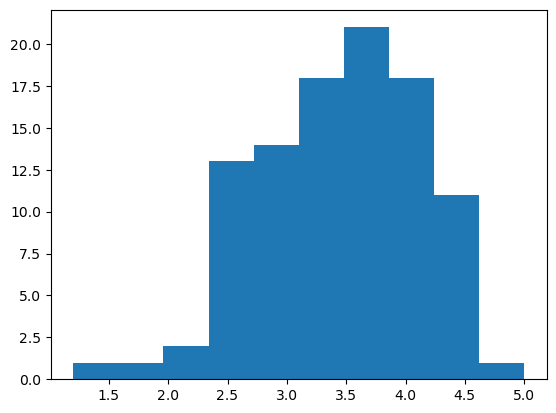

In [15]:
# 100 sample means

sample_means = []
for i in range(100):
    sample_means.append(np.mean(die.sample(5, replace=True)))

import matplotlib.pyplot as plt
histplot = plt.hist(sample_means, bins=10)
plt.show()

In [10]:
# 1000 sample means

sample_means = []
for i in range(1000):
    sample_means.append(np.mean(die.sample(5, replace=True)))

(array([ 14.,  42.,  89., 142., 196., 281., 128.,  68.,  31.,   9.]),
 array([1.4 , 1.84, 2.28, 2.72, 3.16, 3.6 , 4.04, 4.48, 4.92, 5.36, 5.8 ]),
 <BarContainer object of 10 artists>)

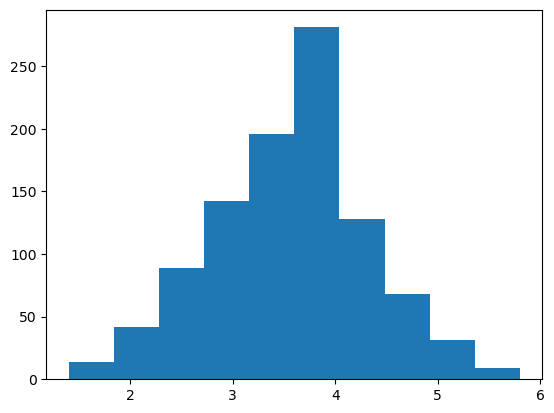

In [11]:
plt.hist(sample_means)

#### The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

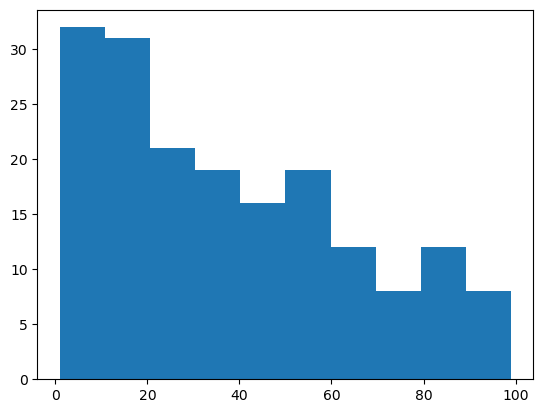

In [17]:
# Create a histogram of the num_users column of amir_deals and show the plot.

amir_deals = pd.read_csv('amir_deals.csv')

plt.hist(amir_deals['num_users'])
plt.show()